In [13]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

### Load and Split the data as Train and Test set

In [4]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Normalize the pixel values
X = X / 255.0

# Split the Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Exploratory Data Analysis




In [16]:
print(X_train.shape)
print(X_train.info())
print(X_train.head())

(56000, 784)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 335.4 MB
None
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
47339     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
67456     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12308     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32557     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
664       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
47339      0.0  ...       0.0       0.0       0.0       0.0       0.0   
67456      0.0  ...       0.0       0.0       0.0       0.0       0.0   
12308      0.0  ...       0.0       0.0       0.0       0.0       0.0   
32557      0.0  ...       0.0       0.

In [17]:
print(X_train.describe())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  56000.0  56000.0  ...  56000.000000  56000.000000  56000.000000   
mean       0.0      0.0  ...      0.000753      0.000382      0.000152   
std        0.0      0.0  ...      0.023040      

In [18]:
print(X_train.isnull().sum())

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


In [14]:
def visualize(df, index = 0):
  image = df.iloc[index].values
  # Reshape the image to be a 28x28 matrix (from a flat, 784-length array)
  image = image.reshape(28, 28)
  # Use imshow to display the image
  plt.imshow(image, cmap='gray')
  plt.show()






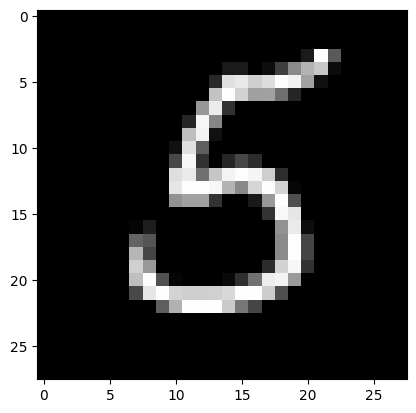

In [15]:
visualize(X_train, 0)

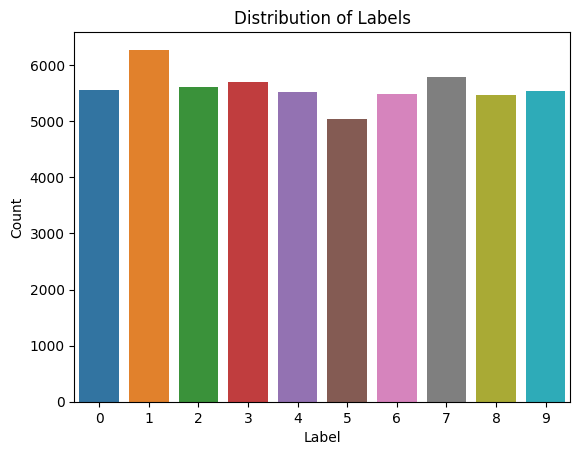

In [20]:
import seaborn as sns

# check the labels distribution
labels = pd.Series(y_train)

# Plot the distribution of labels
sns.countplot(x=labels)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Model Initialization

Remember We want to create a neural network to approximate the classification mapping, we want to set the input as X_train with the dimension (28, 28) now flatten to a Vector 784, we will then build up the layer using this Neuon(Weight and bias).  I also add He normal initialization.

In [ ]:
# Initialize weights and biases for the first layer
W1 = np.random.randn(784, 128) * np.sqrt(2. / 784)
b1 = np.zeros((1, 128))

# Initialize weights and biases for the second layer
W2 = np.random.randn(128, 10) * np.sqrt(2. / 128)
b2 = np.zeros((1, 10))

### Activation Functions

In [28]:
def relu(x):
  return np.maximum(0, x)

In [30]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # subtract max for numerical stability
    return e_x / e_x.sum(axis=1, keepdims=True)


## Forward Propagation

The forward propagation step involves passing the input through the network and computing the output. Here's a simple example of how you might implement this for a feedforward neural network with one hidden layer:

In [31]:
def forward_propagation(X, W1, b1, W2, b2):
  # Compute the output of the first layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    # Compute the output of the second layer
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2  # we need all to calculate in backward propagation


### Loss Computation
Then I need to calculate the Loss function, so that i can further use it for update the network weight and bias

In [32]:
def cross_entropy_loss(y_pred, y_true):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[np.arange(n_samples), y_true.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss


### Backward Propagation
To calculate the gradient of the loss function, propagate backward using the chain rule.

an recap of the forward propagation the I have is :
Z1 = X * W1 + b1
A1 = activation(Z1)
Z2 = A1 * W2 + b2
A2 = softmax(Z2)


so the backward propagation step computes the gradients of the loss L with respect to W1, b1, W2, and b2. The chain rule of calculus is used to compute these gradients in a step-by-step manner.

In [ ]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[0]

    # Compute the derivative of the loss with respect to Z2
    dZ2 = A2 - Y

    # Compute the derivative of the loss with respect to W2 and b2
    dW2 = 1/m * np.dot(A1.T, dZ2)
    db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)

    # Compute the derivative of the loss with respect to Z1
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)

    # Compute the derivative of the loss with respect to W1 and b1
    dW1 = 1/m * np.dot(X.T, dZ1)
    db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

### Gradient descent

Update the Weight and bias for the next episode.

In [ ]:
def gradient_descent_update(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

### Training Loop

So, for now, all the main function for the training has been ready, we can feed the data into the network for the training.

In [ ]:
def train(X_train, Y_train, W1, b1, W2, b2, learning_rate, epochs):
    for epoch in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

        # Compute loss
        loss = cross_entropy_loss(A2, Y_train)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train, W1, b1, W2, b2, Z1, A1, Z2, A2)

        # Gradient descent update
        W1, b1, W2, b2 = gradient_descent_update(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f'Loss at epoch {epoch}: {loss}')

    return W1, b1, W2, b2


In [ ]:
# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Start the training loop
W1, b1, W2, b2 = train(X_train, Y_train, W1, b1, W2, b2, learning_rate, epochs)

### Evaluation

In [ ]:
def evaluate(X_test, Y_test, W1, b1, W2, b2):
    # Forward propagation
    _, _, _, A2 = forward_propagation(X_test, W1, b1, W2, b2)

    # Compute predictions
    predictions = np.argmax(A2, axis=1)

    # Compute true labels
    true_labels = np.argmax(Y_test, axis=1)

    # Compute accuracy
    accuracy = np.mean(predictions == true_labels)

    return accuracy


In [ ]:
accuracy = evaluate(X_test, Y_test, W1, b1, W2, b2)
print(f'Test accuracy: {accuracy}')